# **Import Libraries and modules**

In [0]:
# https://keras.io/
# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
# Performing pip installation of Keras and then importing it

!pip install -q keras
import keras

Using TensorFlow backend.


## Importing Desired Modules and Classes for this Mode

In [0]:
# Used for scientific computing in Python
import numpy as np

# Used to create models layer-by-layer
from keras.models import Sequential

# Different layer modules from keras
from keras.layers import Dense, Dropout, Activation, Flatten, Add

# Used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs and also for Maxpooling
from keras.layers import Convolution2D, MaxPooling2D

# Used for Array and list manipulation
from keras.utils import np_utils

# The MNIST dataset is one of the most common datasets used for image classification 
# taken from American Census Bureau employees and American high school students
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Loading dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Importing and demoing the purpose of Matpotlib

(60000, 28, 28)


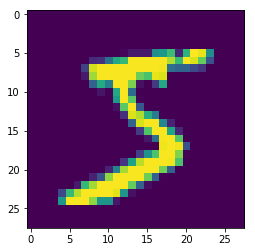

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the 'X' Training and Test Data to be compatible with Convolution2D

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Scaling or Normalizing the inputs

In [0]:
# It is most common to use 32-bit precision when training a neural network
# Since the dataset fits easily in RAM, we might as well convert to float immediately.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the maximum value of a byte and this division will ensure that the input features are scaled between 0.0 and 1.0
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# to_categorical converts this into a matrix with as many columns as there are classes

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## The Model

In [0]:
from keras.layers import Activation

# instantiating a model of type Sequential
model = Sequential()

# adding a convolution layer with input image 28,28,1 with 32 kernels of 3 *3 
# also performing an activation of type 'rectified linear Unit'

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
print(model.output_shape)

# CONVOLUTION BLOCK 1 BEGINS
model.add(Convolution2D(16, 3, 3, activation='relu'))
print(model.output_shape)
model.add(Convolution2D(20, 3, 3, activation='relu'))
print(model.output_shape)
model.add(Convolution2D(32, 3, 3, activation='relu'))
print(model.output_shape)
# CONVOLUTION BLOCK 1 ENDS

# TRANSITION BLOCK 1 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))
# drop out layer
# model.add(Dropout(0.4))
model.add(Convolution2D(16, 1, 1))
print(model.output_shape)
# TRANSITION BLOCK 1 ENDS


# CONVOLUTION BLOCK 2 BEGINS
model.add(Convolution2D(16, 3, 3, activation='relu'))
print(model.output_shape)
model.add(Convolution2D(24, 3, 3, activation='relu'))
print(model.output_shape)
# CONVOLUTION BLOCK 2 ENDS


# TRANSITION BLOCK 2 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))
# drop out layer added
model.add(Dropout(0.4))

model.add(Convolution2D(16,1,1))
print(model.output_shape)
# TRANSITION BLOCK 2 ENDS


model.add(Convolution2D(10, 3, 3, activation='relu'))
print(model.output_shape)

# We need to convert the multidimensional tensor into a single 1-D tensor, so we use Flatten
model.add(Flatten()) #input channel = (1,1,10)

# softmax calculates the probabilities of each target class over all possible target classes
model.add(Activation('softmax'))

(None, 26, 26, 16)
(None, 24, 24, 16)
(None, 22, 22, 20)
(None, 20, 20, 32)
(None, 10, 10, 16)
(None, 8, 8, 16)
(None, 6, 6, 24)
(None, 3, 3, 16)
(None, 1, 1, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27

In [0]:
# prints a summary representation of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 22, 22, 20)        2900      
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 20, 20, 32)        5792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 10, 10, 16)        528       
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 8, 8, 16)          2320      
__________

## Compiling a Model to Train

In [0]:
# Configures the model for training with 3 params which are loss, optimizer and metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training the model for a given number of epochs

In [0]:
# The model is trained for 20 epochs with batch size of 32
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.3380 - acc: 0.8916
Epoch 2/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.1076 - acc: 0.9674
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0817 - acc: 0.9749
Epoch 4/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0710 - acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0626 - acc: 0.9807
Epoch 6/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.0577 - acc: 0.9818
Epoch 7/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0532 - acc: 0.9834
Epoch 8/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0490 - acc: 0.9848
Epoch 9/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0458 - acc: 0.9864
Epoch 10/20
60000/60000 [==============================] - 12s 200us/step - loss: 

## Evaluating the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.021797702482140448, 0.9931]


## Predicting the Output Data

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.48710366e-10 3.48710366e-10 1.47163917e-08 1.39840770e-08
  3.48710366e-10 3.48710366e-10 3.48710366e-10 9.99999762e-01
  3.77452347e-10 1.83954810e-07]
 [1.31268045e-08 1.25751161e-08 9.99999642e-01 7.49052020e-09
  7.49052020e-09 7.49052020e-09 1.78854350e-07 7.49052020e-09
  1.43736258e-07 7.49052020e-09]
 [1.25300289e-07 9.99918699e-01 1.25300289e-07 1.25300289e-07
  6.26790279e-05 1.25300289e-07 1.04331355e-06 1.69038740e-05
  1.25300289e-07 1.25300289e-07]
 [9.99497414e-01 5.77239270e-08 5.77239270e-08 5.77239270e-08
  5.77239270e-08 1.05511481e-06 4.75584995e-04 5.77239270e-08
  8.18435524e-07 2.48703909e-05]
 [9.73795350e-12 9.73795350e-12 9.73795350e-12 9.73795350e-12
  9.99984622e-01 9.73795350e-12 3.22395374e-11 9.73795350e-12
  6.75486889e-10 1.53982764e-05]
 [1.40654123e-07 9.99886870e-01 1.40654123e-07 1.40654123e-07
  4.72560823e-05 1.40654123e-07 2.67009341e-07 6.48440982e-05
  1.43613875e-07 1.40654123e-07]
 [5.48867063e-10 5.48867063e-10 5.48867063e-10 5.48867063e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()